In [3]:
from PIL import Image
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import json
import pygame
from IPython.display import Audio
import pandas as pd

# The sound of the Bulgarian folk embroidery

## Table of Contents
1. Introduction
2. Methods
3. Colours to Notes Map
4. Test Cases
5. Conclusion
6. References

## Introduction

In Bulgarian folk embroidery, a limited number of colours (available through natural dyeing of the threads) are used, along with repetition and symmetry of the motifs.
In music, we also have a limited number of tones that we use, repetition, and harmony.
After years of engaging in music and embroidery, I began to see musical compositions in the embroidery pattern. 
I wondered what the result would be if the colours were replaced with musical notation.

In my project, I analyse and categorise the colours used in Bulgarfolkonal embroidery. 
This analysis aims to identify and catalogue the primary colours used in traditional designs, which will then be converted into musical notes. 
By transforming visual information into music, I aim to explore a new way of interpreting and representing the rich heritage of Bulgarian folk embroidery.

### Methods

### The process involves:

1. Color Extraction: Applying image analysis code to extract the primary colours from the 144 embroidery samples.
2. Palette Analysis: Identifying common colour schemes and shades used in Bulgarian folk embroidery.
3. Conversion to Music: Translating the identified colours into musical notes to create a novel representation of the traditional embroidery patterns.
4. Applying the Colours to Notes mapping on 3 designs chosen from the internet.


### 1. Colour Extraction from the Map

#### The Colors in Bulgarian Traditional Embroidery

For defining the colors catalogue I use illustrations from Irene Yamami's book, Bulgaria in Embroidery ([България в шевици](#ref100)). This book features 144 embroidery samples from various regions of Bulgaria, providing a rich source of colour data for my analysis.

![Bulgarian Embroidery](Images/color_map.png)

Based on the provided map I will mask the backgrounds and contours. 
The black, dark contours are typical for Bulgarian embroidery and because of their repetition, I will remove them, as they do not bring enough value for the aimed result.
With the next step, I will replace the colours close to grey, black and white with clear white (RGB: 255, 255, 255)

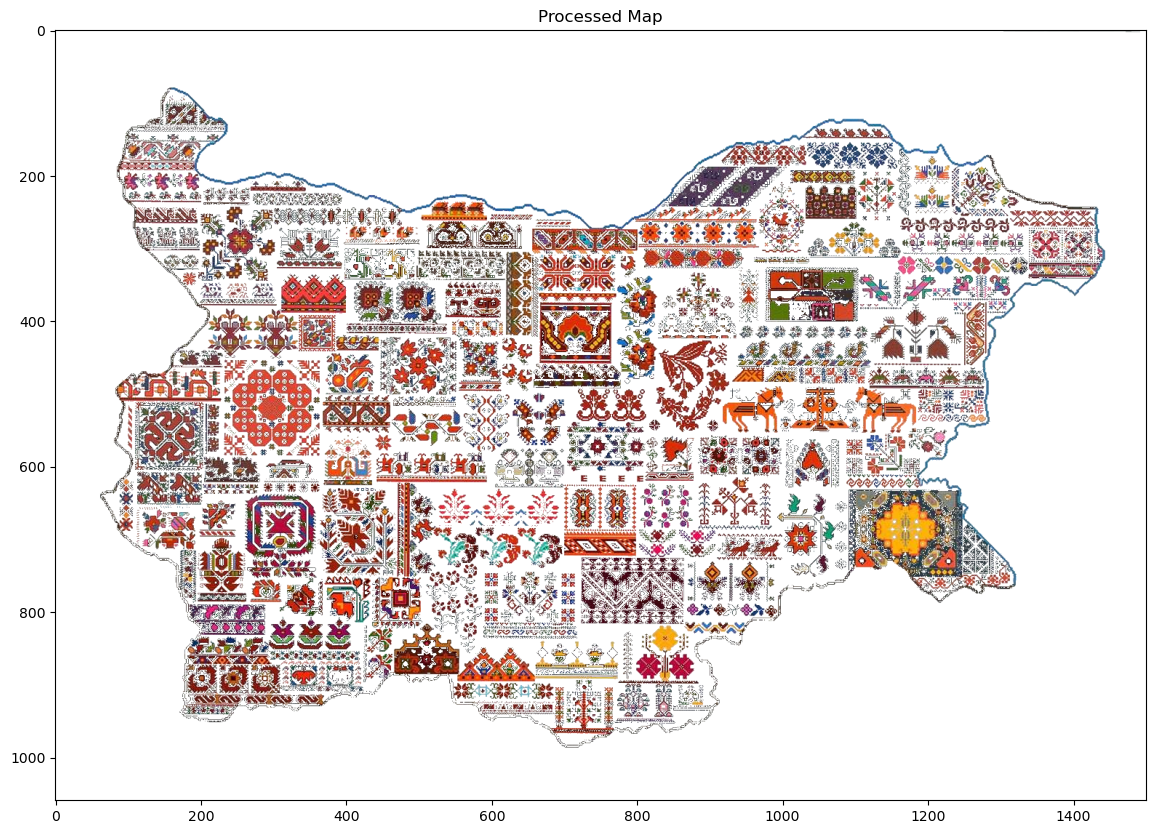

In [2]:
# Load the map
image_path = 'Images/color_map.png'
image = Image.open(image_path)

# Convert image to numpy array
image_array = np.array(image)

# Define color ranges to be removed
grey_threshold = 170
black_threshold = 50
white_threshold = 240

# Apply masks
mask_grey = np.all(image_array[:, :, :3] > grey_threshold, axis=-1)
mask_black = np.all(image_array[:, :, :3] < black_threshold, axis=-1)
mask_white = np.all(image_array[:, :, :3] > white_threshold, axis=-1)

# Combine masks
combined_mask = mask_grey | mask_black | mask_white

# Create a new image with the masked colors replaced by white
result_array = image_array.copy()
result_array[combined_mask] = [255, 255, 255]  # Replace with white

# Convert back to image
result_image = Image.fromarray(result_array)

# Save the result
output_path = 'Images/processed_color_map.png'
result_image.save(output_path)

# Display the processed image
plt.figure(figsize=(25, 10))
plt.title('Processed Map')
plt.imshow(result_image)
plt.show()


In [3]:
# Load the processed image
image_path = "Images/processed_color_map.png"
image = Image.open(image_path)

# Display basic information about the image
image.size, image.mode


((1500, 1059), 'RGB')

In [4]:
# Convert image to numpy array
image_np = np.array(image)

# Reshape to 2D array of pixels (rows: pixels, cols: RGB channels)
pixels = image_np.reshape(-1, 3)

# Convert to tuples to count unique colors
pixels = [tuple(pixel) for pixel in pixels]

# Count occurrences of each color
color_counts = Counter(pixels)

# Check the number of unique colors
print(f"The image contains over {len(color_counts)} unique colors.")


The image contains over 240878 unique colors.


## 2. Palette Analysis

The image contains over 240,000 unique colours. This number is quite high due to the subtle variations in shades and tones. To group these into the 12 specified colour categories (e.g., "red," "blue," etc.), I will define ranges for each colour group and then categorize the pixels accordingly.

**Color Ranges Definition:**

* I created ranges for each of the 12 colour groups. Each range is defined by a minimum and maximum value for the Red, Green, and Blue (RGB) channels.
* For example, "white" is defined by RGB values where each channel (R, G, B) is between 200 and 255, which captures light colours close to white.
* These ranges are broad approximations, designed to group colours into general categories based on common RGB patterns. The boundaries are somewhat arbitrary but are chosen to reflect typical values in these colours. For a more precise classification, the ranges could be fine-tuned based on the specific shades in the image or through more sophisticated methods like clustering or colour analysis algorithms.

**Colour Classification:**

* For each unique colour in the image, I checked if its RGB values fell within any of these predefined ranges.
* If a colour matched a range, it was categorized into the corresponding colour group.
* I used the first matching range, meaning that each colour was classified only once, based on the first range it fits into.

**Pixel Counting:**

* After assigning each colour to a group, I counted how many times each colour appeared in the image.
* The total number of pixels for each colour group was then summed up.

In [5]:
# Define color ranges for the 12 groups
color_ranges = {
    'white':        [(200, 255), (200, 255), (200, 255)],
    'yellow':       [(200, 255), (200, 255), (0, 100)],
    'orange':       [(200, 255), (100, 165), (0, 50)],
    'pale pink':    [(200, 255), (100, 225), (150, 255)], 
    'red':          [(150, 255), (0, 80), (0, 80)],
    'light blue':   [(30, 130),  (158, 255),  (200, 255)],
    'blue':         [(0, 100), (0, 150), (150, 255)],
    'dark blue':    [(0, 50), (0, 80), (100, 180)],
    'green':        [(0, 150), (100, 255), (0, 150)],
    'dark green':   [(0, 80), (50, 150), (0, 80)],
    'brown':        [(100, 200), (50, 100), (0, 50)],
    'dark brown':   [(80, 150), (40, 80), (0, 40)],
    'black':        [(0, 50), (0, 50), (0, 50)]
}

# Function to check if a pixel is within a color range
def is_in_range(pixel, color_range):
    return all(color_range[i][0] <= pixel[i] <= color_range[i][1] for i in range(3))

# Count pixels for each color group
group_counts = {color: 0 for color in color_ranges}

for pixel, count in color_counts.items():
    for color, color_range in color_ranges.items():
        if is_in_range(pixel, color_range):
            group_counts[color] += count
            break

group_counts


{'white': 1206323,
 'yellow': 80,
 'orange': 2913,
 'pale pink': 12430,
 'red': 33570,
 'light blue': 405,
 'blue': 3264,
 'dark blue': 1264,
 'green': 48086,
 'dark green': 25849,
 'brown': 12254,
 'dark brown': 8525,
 'black': 1474}

To convert the colours in the initial image into the specified 13 colour groups (including white and black), I will remap each pixel to the nearest colour in these groups. This process involves finding the closest match in the RGB space for each pixel in the image.

**Steps:**

1. Color Mapping: Map each pixel in the original image to the closest colour in the predefined set.
2. Create a New Image: Generate a new image where each pixel is replaced by its closest match from the 13 colour groups.

In [6]:
image_path = 'Images/processed_color_map.png'
image = Image.open(image_path)
image_data = np.array(image)

# Define the 13 colours (including white), normalized to 0-255 for image processing
color_map = {
    'white': np.array([255, 255, 255]),
    'yellow': np.array([255, 255, 0]),
    'orange': np.array([255, 165, 0]),
    'pale pink': np.array([255, 208, 160]),
    'red': np.array([255, 0, 0]),
    'light blue': np.array([80, 208, 255]),
    'blue': np.array([0, 0, 255]),
    'dark blue': np.array([0, 0, 139]),
    'green': np.array([0, 128, 0]),
    'dark green': np.array([0, 100, 0]),
    'brown': np.array([165, 42, 42]),
    'dark brown': np.array([101, 67, 33]),
    'black': np.array([0, 0, 0])
}

# Convert the color map to a list of colors
colors = list(color_map.values())

# Function to find the closest colour from the predefined list
def closest_color(pixel, colors):
    distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
    return colors[np.argmin(distances)]

# Apply the colour mapping
new_image_data = np.zeros_like(image_data)
for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        new_image_data[i, j] = closest_color(image_data[i, j], colors)

# Create a new image from the remapped data
new_image = Image.fromarray(new_image_data.astype('uint8'))
new_image.save('Images/converted_map.jpg')  # To save the new image


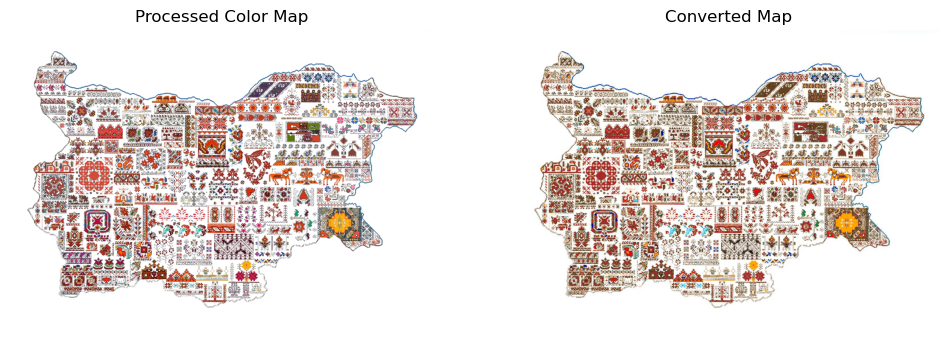

In [7]:
image1 = Image.open('Images/processed_color_map.png')
image2 = Image.open('Images/converted_map.jpg')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image
axs[0].imshow(image1)
axs[0].axis('off')  # Hide axes for better visualization
axs[0].set_title('Processed Color Map')

# Display the second image
axs[1].imshow(image2)
axs[1].axis('off')  # Hide axes for better visualization
axs[1].set_title('Converted Map')

# Show the plot
plt.show()


### Final colour pallet for the Bulgarian folk embroidery

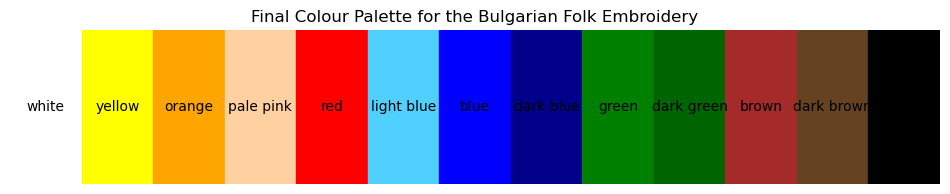

In [8]:
# Define the color palette
color_palette = color_map

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 2))

# Plot each color as a rectangle
for idx, (name, color) in enumerate(color_palette.items()):
    # Normalize the color values to be between 0 and 1
    color_normalized = color / 255
    rect = plt.Rectangle((idx, 0), 1, 1, color=color_normalized)
    ax.add_patch(rect)
    # Add the color name as text on the plot
    ax.text(idx + 0.5, 0.5, name, ha='center', va='center', color='black', fontsize=10)

# Set the limits and remove the axes
plt.title('Final Colour Palette for the Bulgarian Folk Embroidery')
ax.set_xlim(0, len(color_palette))
ax.set_ylim(0, 1)
ax.axis('off')
plt.show()


## 3. Conversion to Music

In the subsequent step, I map the identified colours from the palette to the notes of the Dorian mode, which is frequently utilized in Bulgarian folk music. To perform this mapping, I employ two factors:

1. The wavelength of the colours from the palette, arranged from the darkest to the lightest hue.
2. The acoustic frequencies of the notes in the Dorian mode ([Българска народна музика](#ref200))([Dorian Mode](#ref400) ), are ordered from the lowest to the highest pitch ([Scientific pitch notation](#ref300)).

   
| Color Name     | RGB Value         | Approximate Wavelength (nm) | Note | Frequency (Hz) |
|----------------|--------------------|------------------------------|------|----------------|
| Blue           | [0, 0, 255]        | 450                      | C3    | 130.81         |
| Dark Blue      | [0, 0, 139]        | 460                      | D3    | 146.83         |
| Light Blue     | [80, 208, 255]     | 490                      | Eb3   | 155.56         |
| Dark Green     | [0, 100, 0]        | 520                      | F3    | 174.61         |
| Green          | [0, 128, 0]        | 530                      | G3    | 196.00         |
| Yellow         | [255, 255, 0]      | 575                      | A3    | 220.00         |
| Orange         | [255, 165, 0]      | 600                      | Eb3   | 233.08         |
| Dark Brown     | [101, 67, 33]      | 600                      | C4    | 261.63         |
| Pale Pink      | [255, 208, 160]    | 620                      | D4    | 293.66         |
| Red            | [255, 0, 0]        | 620                      | Eb4   | 311.13         |
| Brown          | [165, 42, 42]      | 700                      | F4    | 349.22         |



### Final Maping Colours to Notes

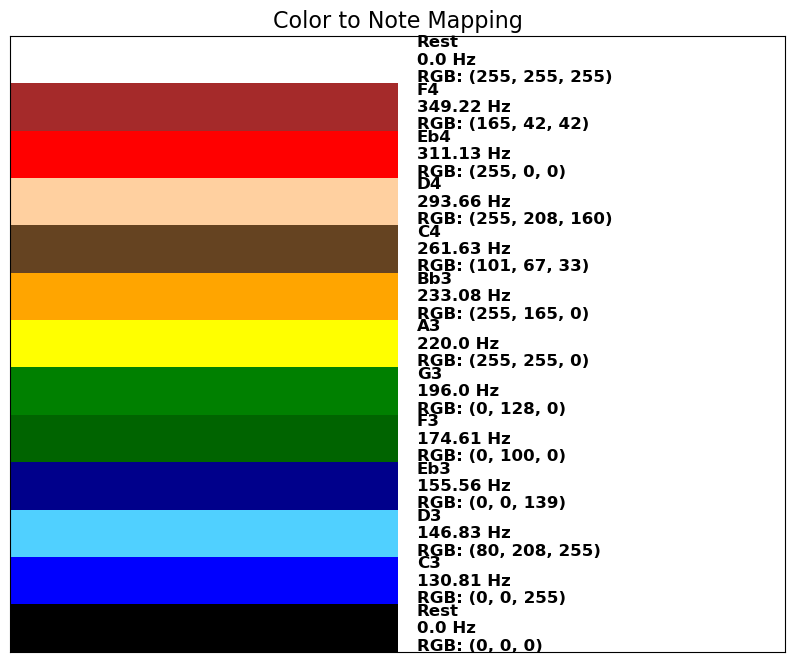

In [9]:
# Data
color_data = {
    "Black": {"RGB": (0, 0, 0), "Frequency (Hz)": 0.0, "Note": "Rest"},
    "Blue": {"RGB": (0, 0, 255), "Frequency (Hz)": 130.81, "Note": "C3"},
    "Light Blue": {"RGB": (80, 208, 255), "Frequency (Hz)": 146.83, "Note": "D3"},
    "Dark Blue": {"RGB": (0, 0, 139), "Frequency (Hz)": 155.56, "Note": "Eb3"},
    "Dark Green": {"RGB": (0, 100, 0), "Frequency (Hz)": 174.61, "Note": "F3"},
    "Green": {"RGB": (0, 128, 0), "Frequency (Hz)": 196.00, "Note": "G3"},
    "Yellow": {"RGB": (255, 255, 0), "Frequency (Hz)": 220.00, "Note": "A3"},
    "Orange": {"RGB": (255, 165, 0), "Frequency (Hz)": 233.08, "Note": "Bb3"},
    "Dark Brown": {"RGB": (101, 67, 33), "Frequency (Hz)": 261.63, "Note": "C4"},
    "Pale Pink": {"RGB": (255, 208, 160), "Frequency (Hz)": 293.66, "Note": "D4"},
    "Red": {"RGB": (255, 0, 0), "Frequency (Hz)": 311.13, "Note": "Eb4"},
    "Brown": {"RGB": (165, 42, 42), "Frequency (Hz)": 349.22, "Note": "F4"},
    "White": {"RGB": (255, 255, 255), "Frequency (Hz)": 0.0, "Note": "Rest"}
}

# Save to a JSON file
with open('color_data.json', 'w') as json_file:
    json.dump(color_data, json_file)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting each color
for i, (color_name, data) in enumerate(color_data.items()):
    rgb = data["RGB"]
    note = data["Note"]
    frequency = data["Frequency (Hz)"]
    
    # Convert RGB to normalized color for plotting
    color = tuple(c / 255.0 for c in rgb)
    
    # Plot a rectangle for each color
    rect = patches.Rectangle((0, i), 1, 1, linewidth=0, edgecolor='none', facecolor=color)
    ax.add_patch(rect)
    
    # Add text label for the note, frequency, and RGB value
    text_label = f"{note}\n{frequency} Hz\nRGB: {rgb}"
    ax.text(1.05, i + 0.5, text_label, ha='left', va='center', fontsize=12, color='black', weight='bold')

# Set axis limits and labels
ax.set_xlim(0, 2)
ax.set_ylim(0, len(color_data))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Color to Note Mapping', fontsize=16)

# Show the plot
plt.show()


## 4. Test Cases

For testing the mapping, I selected three images from the Internet with varying qualities, which required different levels of pre-processing. 
Method:
* image crop
* image mask
* map the design colours to the final mapping
* convert the colours to notes
* convert the notes into midi file
* listen to the resulting mid file

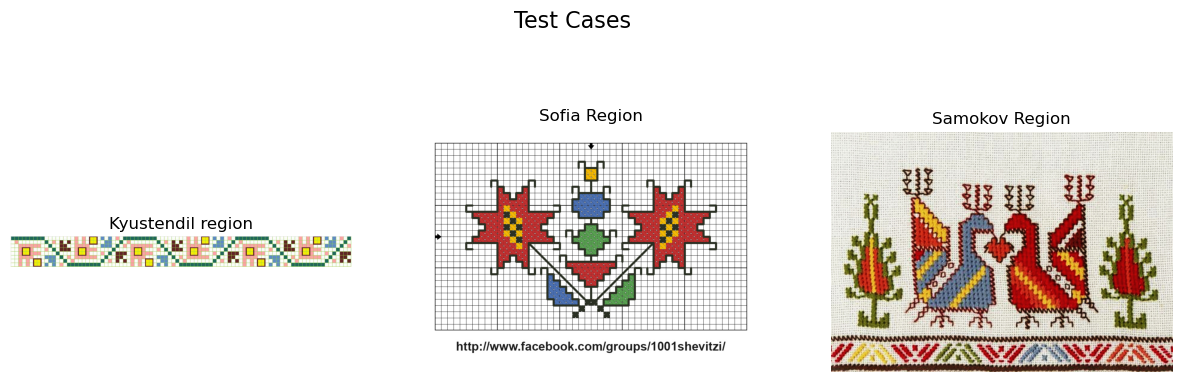

In [10]:
image_paths = ['Images/design_4.jpg', 'Images/design_2a.jpg', 'Images/Original_2.jpg']
mid_paths = ['Outputs/output1.mid', 'Outputs/output2.mid', 'Outputs/output3.mid']
labels = ["Kyustendil region", "Sofia Region", "Samokov Region"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Test Cases', fontsize=16)

for ax, img_path, label in zip(axes, image_paths, labels):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

# Show the plot
plt.show()

## For more and particular details continue to the cases:

1. [Motif from Kyustendil region](Notebooks/Design1_Sound.ipynb)
2. [Motif from Sofia Region](Notebooks/Design2_Sound.ipynb)
3. [Motif from Samokov Region](Notebooks/Design3_Sound.ipynb)

## Results:
![](hp.png)


<iframe src="https://onlinesequencer.net/embeoutput1le.mid" width="500" height="100" frameborder="0"></iframid))


In [11]:
# Initialize pygame
# Samokov Region
pygame.mixer.init()
pygame.mixer.music.load("Outputs/output3.mid")
pygame.mixer.music.play()

In [12]:
# Sofia Region
pygame.mixer.init()
pygame.mixer.music.load("Outputs/output2.mid")
pygame.mixer.music.play()

In [13]:
# Kystendil region
pygame.mixer.init()
pygame.mixer.music.load("Outputs/output1.mid")
pygame.mixer.music.play()

## Conclusion

This project successfully explored the fascinating intersection between Bulgarian folk embroidery and music by developing a method to translate traditional colour patterns into musical compositions. Through the careful extraction and analysis of colours from embroidery samples, we identified key colour schemes and mapped them to musical notes, creating a novel representation of cultural heritage.

The results demonstrate that traditional visual art forms can be reinterpreted through music, offering a fresh perspective on cultural preservation. This work not only celebrates the rich traditions of Bulgarian embroidery but also opens up new avenues for artistic expression, where visual and auditory arts converge.

While the current method has proven effective, there are several potential areas for further exploration. Future work could involve refining the color-to-note mapping to incorporate more complex musical structures, experimenting with different cultural art forms, or even developing interactive tools that allow users to create music from their own visual designs. Additionally, collaborations with ethnomusicologists and artists could deepen the understanding and impact of this interdisciplinary approach.

In conclusion, this project serves as a stepping stone towards a deeper integration of visual and auditory arts, encouraging further research and innovation in this exciting field.

By itself, the output files may seem like a random repetition of notes, but with additional and appropriate subsequent refinement, it produces a surprisingly pleasant sound.

After additional processing with https://www.soundtrap.com/:

![](hp.png)

In [14]:
# Samokov Region
audio = Audio('BonusTrack/Three.mp3')
audio

In [15]:
# Sofia Region
audio = Audio('BonusTrack/Design Two.mp3')
audio

In [16]:
# Kystendil region
audio = Audio('BonusTrack/Design One v2.mp3')
audio

## References

1. <a id="ref100"></a> България в шевици, ISBN-13: 9786199005132, ISBN-10: 6199005139, Author: Ирен Величкова-Ямами
2. <a id="ref200"></a> [Българска народна музика](https://bg.wikipedia.org/wiki/%D0%91%D1%8A%D0%BB%D0%B3%D0%B0%D1%80%D1%81%D0%BA%D0%B0_%D0%BD%D0%B0%D1%80%D0%BE%D0%B4%D0%BD%D0%B0_%D0%BC%D1%83%D0%B7%D0%B8%D0%BA%D0%B0)
3. <a id="ref300"></a> [Scientific pitch notation](https://en.wikipedia.org/wiki/Scientific_pitch_notation)
4. <a id="ref400"></a> [Dorian mode](https://en.wikipedia.org/wiki/Dorian_mode)